# <center> Montre

But : Calculer le prix d'une montre et déterminer les paramètres les plus important pour le prix d'une montre

# 1. Introduction

## 1.1 Les librairies python utilisées dans notre programme

In [78]:
!pip install xgboost

<IPython.core.display.Javascript object>

In [79]:
!pip install shap

<IPython.core.display.Javascript object>

In [80]:
!pip install category-encoders

<IPython.core.display.Javascript object>

In [81]:
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [82]:
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [83]:
from sklearn.metrics import *
from sklearn.metrics import r2_score

<IPython.core.display.Javascript object>

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


# sklearn
# from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import RobustScaler

from category_encoders.target_encoder import TargetEncoder
from sklearn.compose import ColumnTransformer

import shap

shap.initjs()

# model de machine learning
from sklearn.linear_model import LinearRegression, BayesianRidge, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.model_selection import (
    cross_val_score,
    cross_val_predict,
    validation_curve,
    GridSearchCV,
)
from sklearn.ensemble import GradientBoostingRegressor


import time


from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split

# Création de pipelines

from sklearn.pipeline import Pipeline

# Transformateurs de variables
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

<IPython.core.display.Javascript object>

In [85]:
import matplotlib

print("matplotlib: {}".format(matplotlib.__version__))
print("numpy: {}".format(np.__version__))
print("pandas: {}".format(pd.__version__))
print("seaborn: {}".format(sns.__version__))

matplotlib: 3.7.1
numpy: 1.24.3
pandas: 1.5.3
seaborn: 0.12.2


<IPython.core.display.Javascript object>

## 1.2 Les fichiers des données contenus dans le dossier

In [86]:
# Affecter une variable avec le chemin vers le dossier
path = "C:/Users/maimo/Documents/montre/"
os.listdir(path)  # methode affichant tous les fichiers contenus dans notre dossier

['.ipynb_checkpoints',
 'Luxury watch.csv',
 'montre.ipynb',
 'shape_values_emissions.png']

<IPython.core.display.Javascript object>

In [87]:
path + "Luxury watch.csv"  # le chemin du fichier  dans mon ordinateur

'C:/Users/maimo/Documents/montre/Luxury watch.csv'

<IPython.core.display.Javascript object>

# 2. Présentation du data

## 2.1 Data

In [88]:
watch = pd.read_csv(path + "Luxury watch.csv")

<IPython.core.display.Javascript object>

In [89]:
watch.head()

,Brand,Model,Case Material,Strap Material,Movement Type,Water Resistance,Case Diameter (mm),Case Thickness (mm),Band Width (mm),Dial Color,Crystal Material,Complications,Power Reserve,Price (USD)
0,Rolex,Submariner,Stainless Steel,Stainless Steel,Automatic,300 meters,40.0,13.00,20.0,Black,Sapphire,Date,48 hours,"9,500"
1,Omega,Seamaster,Titanium,Rubber,Automatic,600 meters,43.5,14.47,21.0,Blue,Sapphire,Date,60 hours,"5,800"
2,Tag Heuer,Carrera,Stainless Steel,Leather,Automatic,100 meters,41.0,13.00,20.0,White,Sapphire,Chronograph,42 hours,"4,200"
3,Breitling,Navitimer,Stainless Steel,Stainless Steel,Automatic,30 meters,43.0,14.25,22.0,Black,Sapphire,Chronograph,70 hours,"7,900"
4,Cartier,Tank Solo,Stainless Steel,Leather,Quartz,30 meters,31.0,6.05,20.0,Silver,Sapphire,None,NaN,"2,800"


<IPython.core.display.Javascript object>

In [90]:
print(f"shape : {watch.shape}")
print(f"le nombre de lignes est : {watch.shape[0]}")
print(f"le nombre de colonnes est : {watch.shape[1]}")

shape : (507, 14)
le nombre de lignes est : 507
le nombre de colonnes est : 14


<IPython.core.display.Javascript object>

In [91]:
watch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                507 non-null    object 
 1   Model                507 non-null    object 
 2   Case Material        507 non-null    object 
 3   Strap Material       507 non-null    object 
 4   Movement Type        507 non-null    object 
 5   Water Resistance     507 non-null    object 
 6   Case Diameter (mm)   507 non-null    float64
 7   Case Thickness (mm)  507 non-null    float64
 8   Band Width (mm)      507 non-null    float64
 9   Dial Color           507 non-null    object 
 10  Crystal Material     507 non-null    object 
 11  Complications        507 non-null    object 
 12  Power Reserve        493 non-null    object 
 13  Price (USD)          506 non-null    object 
dtypes: float64(3), object(11)
memory usage: 55.6+ KB


<IPython.core.display.Javascript object>

In [92]:
watch["Power Reserve"]

0       48 hours
1       60 hours
2       42 hours
3       70 hours
4            NaN
         ...    
502     38 hours
503    120 hours
504     64 hours
505     40 hours
506     38 hours
Name: Power Reserve, Length: 507, dtype: object

<IPython.core.display.Javascript object>

In [93]:
watch.nunique()

Brand                   39
Model                   95
Case Material           17
Strap Material          14
Movement Type            4
Water Resistance        12
Case Diameter (mm)      37
Case Thickness (mm)    123
Band Width (mm)         14
Dial Color               7
Crystal Material         4
Complications           30
Power Reserve           25
Price (USD)            182
dtype: int64

<IPython.core.display.Javascript object>

In [94]:
watch.describe()

,Case Diameter (mm),Case Thickness (mm),Band Width (mm)
count,507.000000,507.000000,507.000000
mean,41.046154,11.588343,21.105523
std,2.535339,2.491481,1.658375
min,27.500000,5.000000,15.000000
25%,40.000000,9.800000,20.000000
50%,41.000000,12.000000,20.000000
75%,42.000000,13.300000,22.000000
max,46.500000,17.500000,28.000000


<IPython.core.display.Javascript object>

## 2.2 Colonnes numériques

In [95]:
cols_num_tot = watch.select_dtypes(include=np.number).columns  # les colonnes numériques
cols_num_tot

Index(['Case Diameter (mm)', 'Case Thickness (mm)', 'Band Width (mm)'], dtype='object')

<IPython.core.display.Javascript object>

Nous avons ainsi toutes les colonnes numériques affichées ci-dessus.

In [96]:
print(f"il y a {len(cols_num_tot)} colonnes numériques")

il y a 3 colonnes numériques


<IPython.core.display.Javascript object>

## 2.3 Colonnes catégoriques

In [97]:
cols_cat = watch.select_dtypes(exclude=np.number).columns  # les colonnes catégorielles
cols_cat

Index(['Brand', 'Model', 'Case Material', 'Strap Material', 'Movement Type',
       'Water Resistance', 'Dial Color', 'Crystal Material', 'Complications',
       'Power Reserve', 'Price (USD)'],
      dtype='object')

<IPython.core.display.Javascript object>

In [98]:
print(f"il y a {len(cols_cat)} colonnes catégoriques")

il y a 11 colonnes catégoriques


<IPython.core.display.Javascript object>

# 3 Nettoyage

In [99]:
watch.head(2)

,Brand,Model,Case Material,Strap Material,Movement Type,Water Resistance,Case Diameter (mm),Case Thickness (mm),Band Width (mm),Dial Color,Crystal Material,Complications,Power Reserve,Price (USD)
0,Rolex,Submariner,Stainless Steel,Stainless Steel,Automatic,300 meters,40.0,13.00,20.0,Black,Sapphire,Date,48 hours,"9,500"
1,Omega,Seamaster,Titanium,Rubber,Automatic,600 meters,43.5,14.47,21.0,Blue,Sapphire,Date,60 hours,"5,800"


<IPython.core.display.Javascript object>

## 3.1 Suppression des lignes

### 3.1.1 les lignes sans prix

L'objectif est de calculer les prix des montres ainsi les lignes n'ayant pas de prix sont inutiles pour nous.

In [100]:
prix_manquant = watch[
    watch["Price (USD)"].isna()
]  # filtre les lignes où 'Price (USD)' sont manquantes
prix_manquant

,Brand,Model,Case Material,Strap Material,Movement Type,Water Resistance,Case Diameter (mm),Case Thickness (mm),Band Width (mm),Dial Color,Crystal Material,Complications,Power Reserve,Price (USD)
24,Bell & Ross,BR 03-92,Ceramic,Rubber,Automatic,100 meters,42.0,9.3,22.0,Black,Sapphire,None,"4,200",NaN


<IPython.core.display.Javascript object>

In [101]:
listeprix = list(
    prix_manquant["Price (USD)"]
)  # création d'une liste ayant tous les prix non renseignés
# listecode

<IPython.core.display.Javascript object>

In [102]:
# Affecter une varible avec les index des ligne sans prix 'listecode' dans data
index_prix_manquant = watch.loc[watch["Price (USD)"].isin(listeprix)].index
index_prix_manquant

Int64Index([24], dtype='int64')

<IPython.core.display.Javascript object>

In [103]:
# suppression toutes les lignes ayant l'index dans la liste
print(f"Ancien shape= {watch.shape}")
a = watch.shape[0]
watch.drop(index=index_prix_manquant, axis=0, inplace=True)
b = watch.shape[0]
print(f"Nouveau shape= {watch.shape}\n")
print(f"On a donc supprimé {a-b} lignes")

Ancien shape= (507, 14)
Nouveau shape= (506, 14)

On a donc supprimé 1 lignes


<IPython.core.display.Javascript object>

### 3.1.2 Power Reserve

Nous supprimerons les lignes non complète dans Power Reserve

In [104]:
pow_manquant = watch[
    watch["Power Reserve"].isna()
]  # filtre les lignes où 'Power Reserve' sont manquantes
pow_manquant

,Brand,Model,Case Material,Strap Material,Movement Type,Water Resistance,Case Diameter (mm),Case Thickness (mm),Band Width (mm),Dial Color,Crystal Material,Complications,Power Reserve,Price (USD)
4,Cartier,Tank Solo,Stainless Steel,Leather,Quartz,30 meters,31.0,6.05,20.0,Silver,Sapphire,None,NaN,"2,800"
26,Cartier,Santos-Dumont,Stainless Steel,Leather,Quartz,30 meters,38.0,7.50,18.0,Silver,Sapphire,None,NaN,"3,500"
87,Cartier,Tank Solo,Stainless Steel,Leather,Quartz,30 meters,31.0,6.05,20.0,Silver,Sapphire,None,NaN,"2,800"
93,Bulova,Precisionist,Stainless Steel,Stainless Steel,Quartz,300 meters,46.5,17.50,24.0,Black,Mineral,Chronograph,NaN,650
103,Longines,Conquest VHP,Stainless Steel,Stainless Steel,Quartz,50 meters,41.0,12.10,20.0,Black,Sapphire,"Chronograph, Date",NaN,"1,500"
165,Rado,True Thinline,High-Tech Ceramic,Leather,Quartz,30 meters,39.0,5.00,22.0,Black,Sapphire,None,NaN,"1,600"
174,Tag Heuer,Aquaracer,Stainless Steel,Stainless Steel,Quartz,300 meters,43.0,10.80,20.0,Blue,Sapphire,None,NaN,"1,800"
212,Tag Heuer,Aquaracer,Stainless Steel,Stainless Steel,Quartz,300 meters,32.0,9.50,15.0,Blue,Sapphire,None,NaN,"1,700"
216,Tag Heuer,Aquaracer,Stainless Steel,Stainless Steel,Quartz,300 meters,43.0,10.80,21.0,Blue,Sapphire,Date,NaN,"2,600"
244,Chopard,Happy Sport,Stainless Steel,Leather,Quartz,30 meters,30.0,10.50,17.0,White,Sapphire,None,NaN,"5,000"


<IPython.core.display.Javascript object>

In [105]:
print(
    f" le nombre de ligne vaut { round(len(pow_manquant)/ 506 * 100, 2)} % du nombre de ligne total du dataframe initial"
)

 le nombre de ligne vaut 2.77 % du nombre de ligne total du dataframe initial


<IPython.core.display.Javascript object>

Ainis il ne semble pas dérangeant de supprimer ces lignes.

In [106]:
listepow = list(
    pow_manquant["Power Reserve"]
)  # création d'une liste ayant tous les Power Reserve non renseignés
# listecode

<IPython.core.display.Javascript object>

In [107]:
# Affecter une varible avec les index des non pays 'Power Reserve' dans data
index_pow_manquant = watch.loc[watch["Power Reserve"].isin(listepow)].index
index_pow_manquant

Int64Index([4, 26, 87, 93, 103, 165, 174, 212, 216, 244, 272, 306, 349, 374], dtype='int64')

<IPython.core.display.Javascript object>

In [108]:
# suppression toutes les lignes ayant l'index dans la liste
print(f"Ancien shape= {watch.shape}")
a = watch.shape[0]
watch.drop(index=index_pow_manquant, axis=0, inplace=True)
b = watch.shape[0]
print(f"Nouveau shape= {watch.shape}\n")
print(f"On a donc supprimé {a-b} lignes")

Ancien shape= (506, 14)
Nouveau shape= (492, 14)

On a donc supprimé 14 lignes


<IPython.core.display.Javascript object>

## 3.2 Coventir des valeurs catégorielles en valeurs numériques

In [109]:
watch.head(2)

,Brand,Model,Case Material,Strap Material,Movement Type,Water Resistance,Case Diameter (mm),Case Thickness (mm),Band Width (mm),Dial Color,Crystal Material,Complications,Power Reserve,Price (USD)
0,Rolex,Submariner,Stainless Steel,Stainless Steel,Automatic,300 meters,40.0,13.00,20.0,Black,Sapphire,Date,48 hours,"9,500"
1,Omega,Seamaster,Titanium,Rubber,Automatic,600 meters,43.5,14.47,21.0,Blue,Sapphire,Date,60 hours,"5,800"


<IPython.core.display.Javascript object>

Les colonnes 'Water Resistance', 'Power Reserve' et 'Price (USD)' devraient être des colonnes numériques cependant elles sont considérées comme des colonnes catégorielles à cause de leurs unités sur chaque ligne. Ainsi nous devons supprimer les unités et transformer les valeurs en float. Il faudra bien vérifier que toutes les valeurs uniques sont dans la même unité

### 3.2.1 'Water Resistance'

In [110]:
watch["Water Resistance"].unique()

array(['300 meters', '600 meters', '100 meters', '30 meters',
       '200 meters', '50 meters', '150 meters', '500 meters', '60 meters',
       '120 meters', '1000 meters', '2000 meters'], dtype=object)

<IPython.core.display.Javascript object>

Nous allons supprimer les unités dans chacune des lignes de cette série. De plus nous transformerons le type objet en type float

In [111]:
watch = watch.rename(
    columns={"Water Resistance": "Water Resistance (m)"}
)  # ajouter l'unité dans la colonne
watch.head(2)

,Brand,Model,Case Material,Strap Material,Movement Type,Water Resistance (m),Case Diameter (mm),Case Thickness (mm),Band Width (mm),Dial Color,Crystal Material,Complications,Power Reserve,Price (USD)
0,Rolex,Submariner,Stainless Steel,Stainless Steel,Automatic,300 meters,40.0,13.00,20.0,Black,Sapphire,Date,48 hours,"9,500"
1,Omega,Seamaster,Titanium,Rubber,Automatic,600 meters,43.5,14.47,21.0,Blue,Sapphire,Date,60 hours,"5,800"


<IPython.core.display.Javascript object>

In [112]:
def metre(x):
    i = 0
    b = []
    for i in range(len(x)):
        b = x.split("m", 2)  # Separer la chaine de caractère en 2
        b = b[0]  # recuperer uniquement la 1ere partie chaine de caractère
        c = float(b)  # transformer en float
    return c

<IPython.core.display.Javascript object>

In [113]:
watch["Water Resistance (m)"] = watch["Water Resistance (m)"].apply(metre)

<IPython.core.display.Javascript object>

In [114]:
watch["Water Resistance (m)"]  # verifier

0      300.0
1      600.0
2      100.0
3       30.0
5       30.0
       ...  
502     30.0
503    300.0
504     30.0
505    150.0
506     50.0
Name: Water Resistance (m), Length: 492, dtype: float64

<IPython.core.display.Javascript object>

### 3.2.2 Power Reserve

In [115]:
watch["Power Reserve"].unique()

array(['48 hours', '60 hours', '42 hours', '70 hours', '45 hours',
       '50 hours', '270 days', '38 hours', '80 hours', '64 hours',
       '40 hours', '56 hours', '120 hours', '68 hours', '54 hours',
       '46 hours', '72 hours', '44 hours', '210 days', '65 hours',
       '43 hours', '41 hours', '55 hours', '168 hours'], dtype=object)

<IPython.core.display.Javascript object>

Attention nous remarquons que deux valeurs sont en jours, nous devons les convertir en heures en multipliant par 24. 

In [116]:
print(270 * 24)
print(210 * 24)

6480
5040


<IPython.core.display.Javascript object>

In [117]:
# changer la chaine de caractère de jour en heures
watch["Power Reserve"] = watch["Power Reserve"].str.replace("270 days", "6480 h")
watch["Power Reserve"] = watch["Power Reserve"].str.replace("210 days", "5040 h")
# verifier que toutes les valeurs sont en heures
watch["Power Reserve"].unique()

array(['48 hours', '60 hours', '42 hours', '70 hours', '45 hours',
       '50 hours', '6480 h', '38 hours', '80 hours', '64 hours',
       '40 hours', '56 hours', '120 hours', '68 hours', '54 hours',
       '46 hours', '72 hours', '44 hours', '5040 h', '65 hours',
       '43 hours', '41 hours', '55 hours', '168 hours'], dtype=object)

<IPython.core.display.Javascript object>

In [118]:
watch = watch.rename(
    columns={"Power Reserve": "Power Reserve(hours)"}
)  # ajouter l'unité dans la colonne
watch.head(2)

,Brand,Model,Case Material,Strap Material,Movement Type,Water Resistance (m),Case Diameter (mm),Case Thickness (mm),Band Width (mm),Dial Color,Crystal Material,Complications,Power Reserve(hours),Price (USD)
0,Rolex,Submariner,Stainless Steel,Stainless Steel,Automatic,300.0,40.0,13.00,20.0,Black,Sapphire,Date,48 hours,"9,500"
1,Omega,Seamaster,Titanium,Rubber,Automatic,600.0,43.5,14.47,21.0,Blue,Sapphire,Date,60 hours,"5,800"


<IPython.core.display.Javascript object>

In [119]:
def hours(x):
    i = 0
    b = []
    for i in range(len(x)):
        b = x.split("h", 2)  # Separer la chaine de caractère en 2
        b = b[0]  # recuperer uniquement la 1ere partie chaine de caractère
        c = float(b)  # transformer en float
    return c

<IPython.core.display.Javascript object>

In [120]:
watch["Power Reserve(hours)"] = watch["Power Reserve(hours)"].apply(hours)

<IPython.core.display.Javascript object>

In [121]:
watch["Power Reserve(hours)"]  # verifier type float

0       48.0
1       60.0
2       42.0
3       70.0
5       45.0
       ...  
502     38.0
503    120.0
504     64.0
505     40.0
506     38.0
Name: Power Reserve(hours), Length: 492, dtype: float64

<IPython.core.display.Javascript object>

### 3.2.3 'Price (USD)'

In [122]:
watch = watch.rename(
    columns={"Price (USD)": "Price_(USD)"}
)  # ajouter l'unité dans la colonne
watch.head(2)

,Brand,Model,Case Material,Strap Material,Movement Type,Water Resistance (m),Case Diameter (mm),Case Thickness (mm),Band Width (mm),Dial Color,Crystal Material,Complications,Power Reserve(hours),Price_(USD)
0,Rolex,Submariner,Stainless Steel,Stainless Steel,Automatic,300.0,40.0,13.00,20.0,Black,Sapphire,Date,48.0,"9,500"
1,Omega,Seamaster,Titanium,Rubber,Automatic,600.0,43.5,14.47,21.0,Blue,Sapphire,Date,60.0,"5,800"


<IPython.core.display.Javascript object>

In [123]:
# supprimer la virgule
watch["Price_(USD)"] = watch["Price_(USD)"].str.replace(",", "")
watch["Price_(USD)"]

0       9500
1       5800
2       4200
3       7900
5       5500
       ...  
502    21500
503    13500
504     1800
505    19000
506     1200
Name: Price_(USD), Length: 492, dtype: object

<IPython.core.display.Javascript object>

In [124]:
# tranforme en float
watch["Price_(USD)"] = watch["Price_(USD)"].apply(lambda x: float(x))
watch["Price_(USD)"].head()

0    9500.0
1    5800.0
2    4200.0
3    7900.0
5    5500.0
Name: Price_(USD), dtype: float64

<IPython.core.display.Javascript object>

## 3.3 Les valeurs très corrélées

<Axes: >

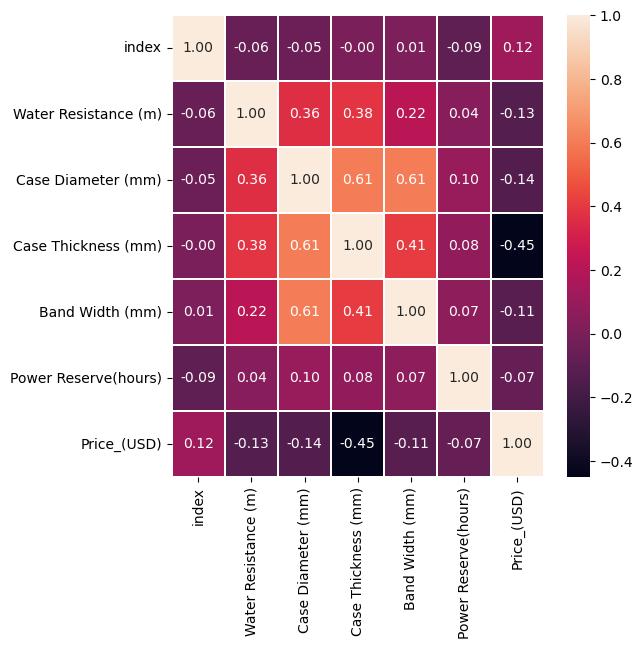

<IPython.core.display.Javascript object>

In [125]:
plt.figure(figsize=(6, 6))
corr_mat = sns.heatmap(
    watch2.select_dtypes(include=np.number).corr(),
    annot=True,
    linewidths=0.1,
    fmt=".2f",
)
corr_mat

Il n'y a pas de valeurs très corrélées ainsi nous conserverons notre data actuelle

## 3.4 Data nettoyé

In [126]:
watch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 0 to 506
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 492 non-null    object 
 1   Model                 492 non-null    object 
 2   Case Material         492 non-null    object 
 3   Strap Material        492 non-null    object 
 4   Movement Type         492 non-null    object 
 5   Water Resistance (m)  492 non-null    float64
 6   Case Diameter (mm)    492 non-null    float64
 7   Case Thickness (mm)   492 non-null    float64
 8   Band Width (mm)       492 non-null    float64
 9   Dial Color            492 non-null    object 
 10  Crystal Material      492 non-null    object 
 11  Complications         492 non-null    object 
 12  Power Reserve(hours)  492 non-null    float64
 13  Price_(USD)           492 non-null    float64
dtypes: float64(6), object(8)
memory usage: 57.7+ KB


<IPython.core.display.Javascript object>

In [127]:
watch2 = watch.reset_index()  # Réinitialiser les index

<IPython.core.display.Javascript object>

In [128]:
watch2.info()  # verifier le nombre d'entrée

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 492 non-null    int64  
 1   Brand                 492 non-null    object 
 2   Model                 492 non-null    object 
 3   Case Material         492 non-null    object 
 4   Strap Material        492 non-null    object 
 5   Movement Type         492 non-null    object 
 6   Water Resistance (m)  492 non-null    float64
 7   Case Diameter (mm)    492 non-null    float64
 8   Case Thickness (mm)   492 non-null    float64
 9   Band Width (mm)       492 non-null    float64
 10  Dial Color            492 non-null    object 
 11  Crystal Material      492 non-null    object 
 12  Complications         492 non-null    object 
 13  Power Reserve(hours)  492 non-null    float64
 14  Price_(USD)           492 non-null    float64
dtypes: float64(6), int64(1)

<IPython.core.display.Javascript object>

In [129]:
cols_num_tot = watch.select_dtypes(include=np.number).columns  # les colonnes numériques
cols_num_tot

Index(['Water Resistance (m)', 'Case Diameter (mm)', 'Case Thickness (mm)',
       'Band Width (mm)', 'Power Reserve(hours)', 'Price_(USD)'],
      dtype='object')

<IPython.core.display.Javascript object>

# 4. Exploration de données

In [130]:
watch2.nunique()

index                   492
Brand                    37
Model                    89
Case Material            16
Strap Material           14
Movement Type             3
Water Resistance (m)     12
Case Diameter (mm)       32
Case Thickness (mm)     116
Band Width (mm)          12
Dial Color                7
Crystal Material          4
Complications            30
Power Reserve(hours)     24
Price_(USD)             179
dtype: int64

<IPython.core.display.Javascript object>

## 4.1 Dial Color

### 4.1.1 Répartition Dial Color

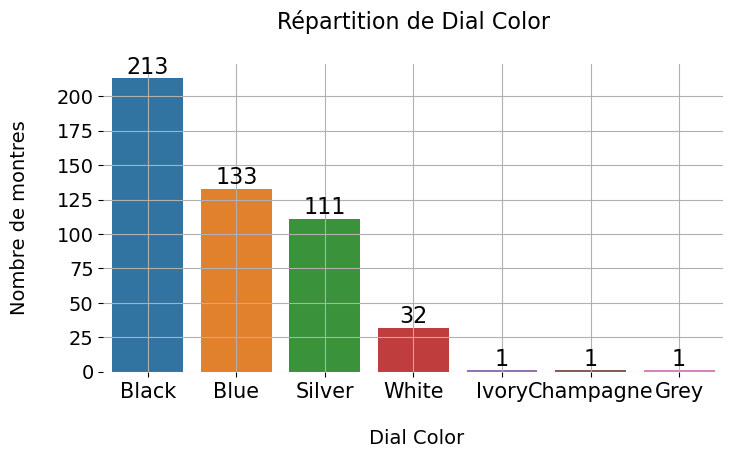

<IPython.core.display.Javascript object>

In [131]:
fig = plt.figure(1, figsize=(8, 4))
Nbr_Dial_Color_Types = watch2["Dial Color"].value_counts()
ND = sns.barplot(x=Nbr_Dial_Color_Types.index, y=Nbr_Dial_Color_Types.values)

# supprimer les bordures du graphe (côté esthétique)
for s in ["top", "bottom", "left", "right"]:
    ND.spines[s].set_visible(False)

ND.bar_label(ND.containers[0], fontsize=16)  # la valeur de l'ordonnée sur la bar


plt.xticks(fontsize=15)
plt.yticks(fontsize=14)

# légender le graphe
plt.title("Répartition de Dial Color\n", fontsize=16)  # titre
plt.xlabel("\n Dial Color", fontsize=14)  # nom axe des abscisses
plt.ylabel("Nombre de montres\n", fontsize=14)  # nom axe des ordonnées
plt.grid()
plt.show()

## 4.1.2 Répartition Dial Color par rapport au prix de la montre

Text(0.5, 1.0, 'Prix de la montre par type de Dial Color\n')

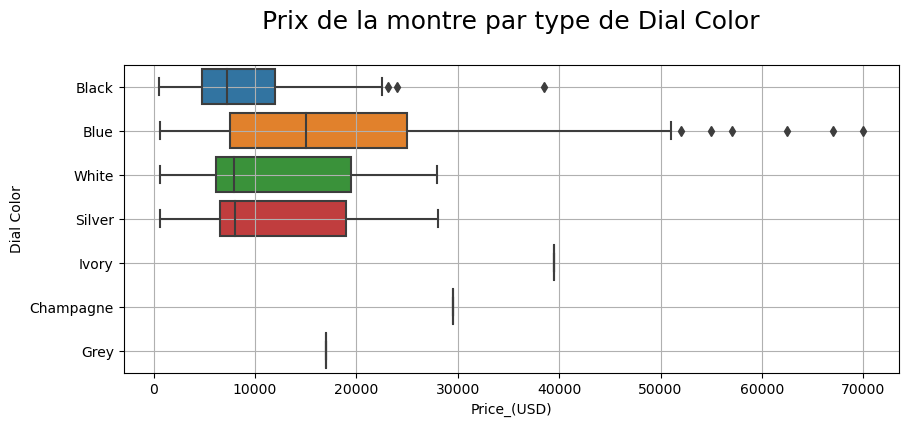

<IPython.core.display.Javascript object>

In [132]:
plt.figure(figsize=(10, 4))
sns.boxplot(x="Price_(USD)", y="Dial Color", data=watch2)
plt.grid()
plt.title("Prix de la montre par type de Dial Color\n", fontsize=18)

## 4.2 Strap Material

### 4.2.1 Répartition Strap Material

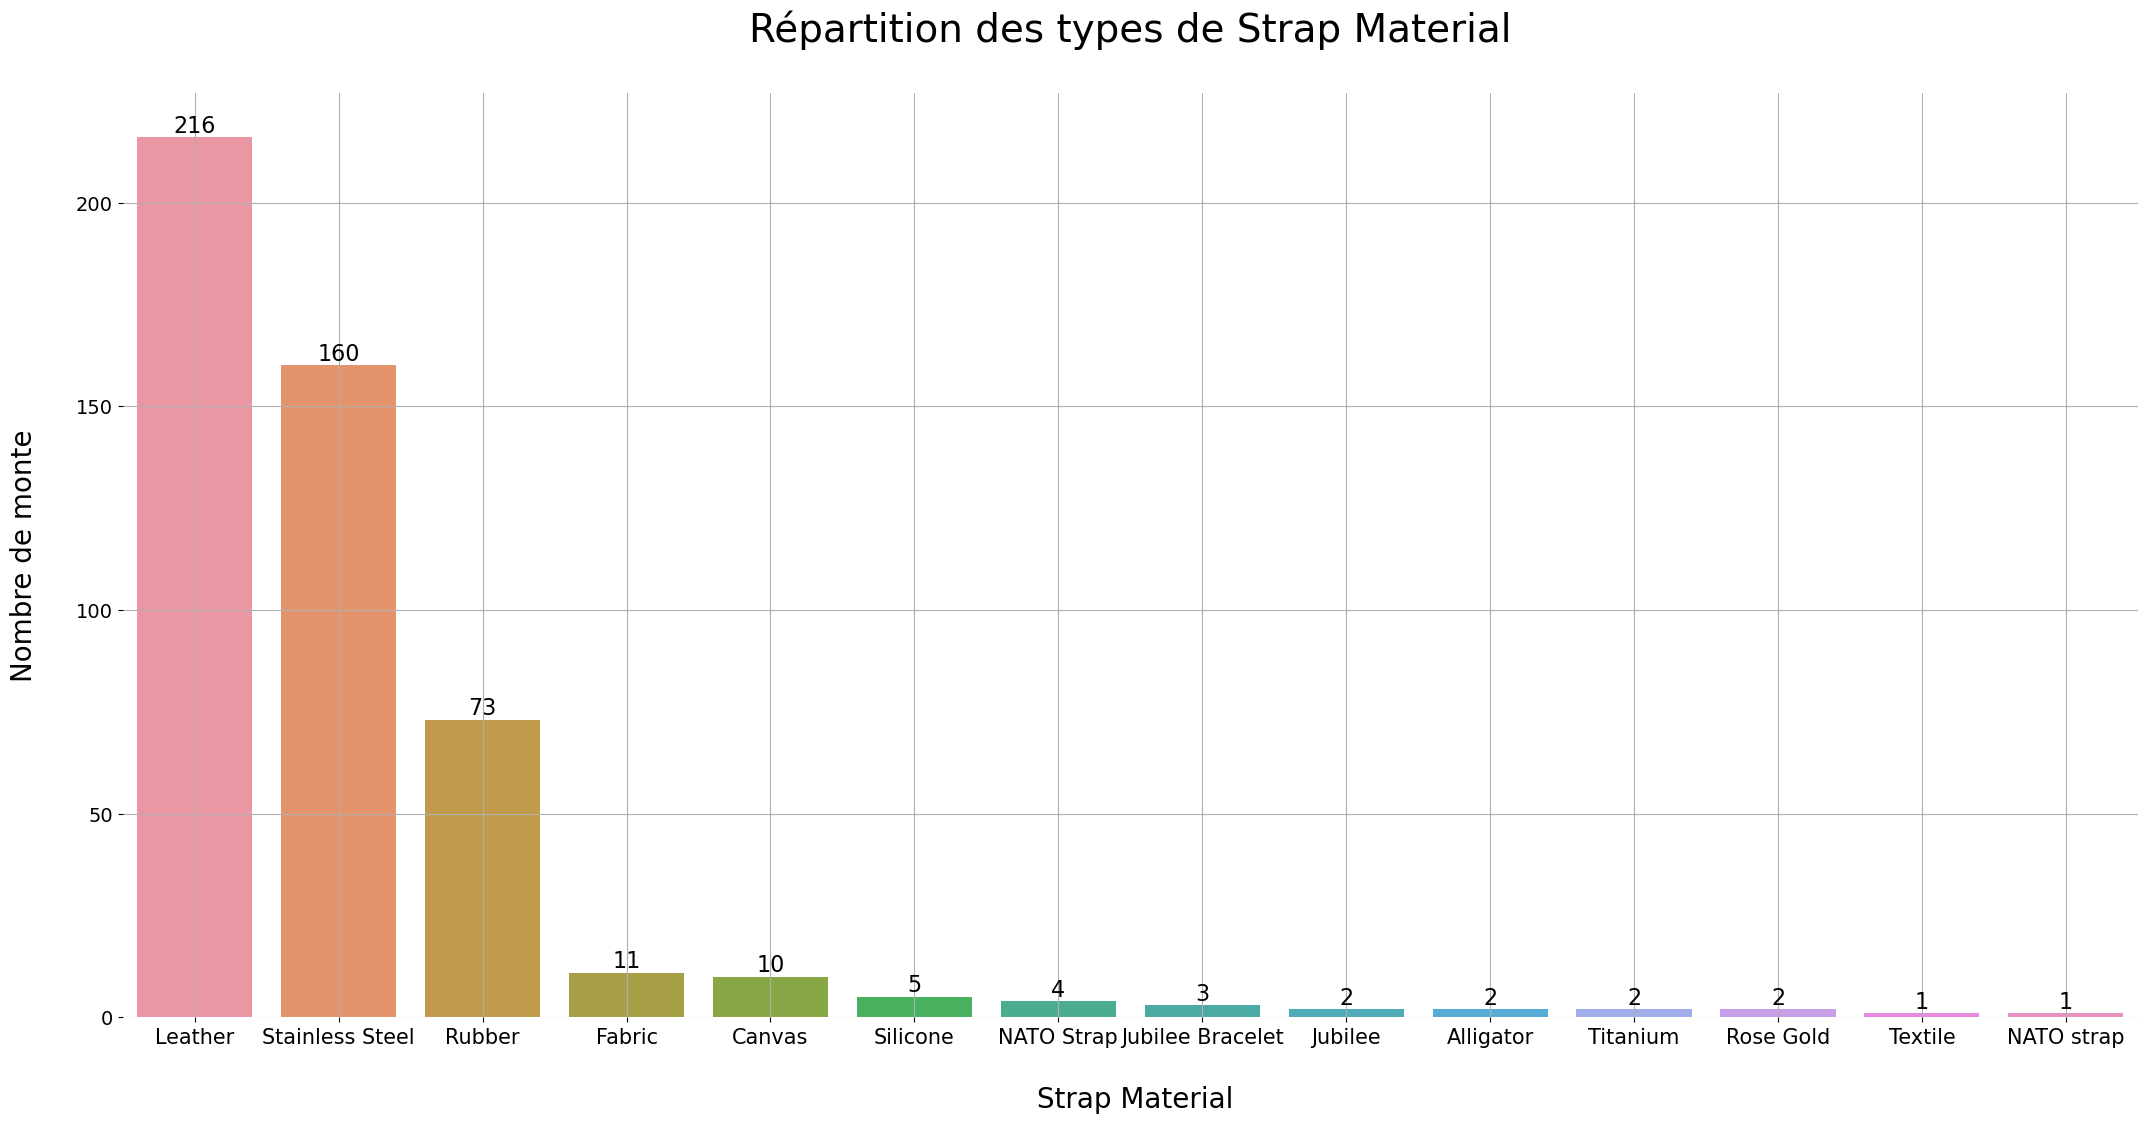

<IPython.core.display.Javascript object>

In [133]:
fig = plt.figure(1, figsize=(26, 12))
Nbr_Strap = watch2["Strap Material"].value_counts()
NBS = sns.barplot(x=Nbr_Strap.index, y=Nbr_Strap.values)

# supprimer les bordures du graphe (côté esthétique)
for s in ["top", "bottom", "left", "right"]:
    NBS.spines[s].set_visible(False)

NBS.bar_label(NBS.containers[0], fontsize=16)  # la valeur de l'ordonnée sur la bar


plt.xticks(fontsize=15)
plt.yticks(fontsize=14)

# légender le graphe
plt.title("Répartition des types de Strap Material\n", fontsize=28)  # titre
plt.xlabel("\n Strap Material", fontsize=20)  # nom axe des abscisses
plt.ylabel("Nombre de monte\n", fontsize=20)  # nom axe des ordonnées
plt.grid()
plt.show()

## 4.2.2 Répartition Strap Material par rapport au prix de la montre

Text(0.5, 1.0, 'Prix de la montre par type de Strap Material\n')

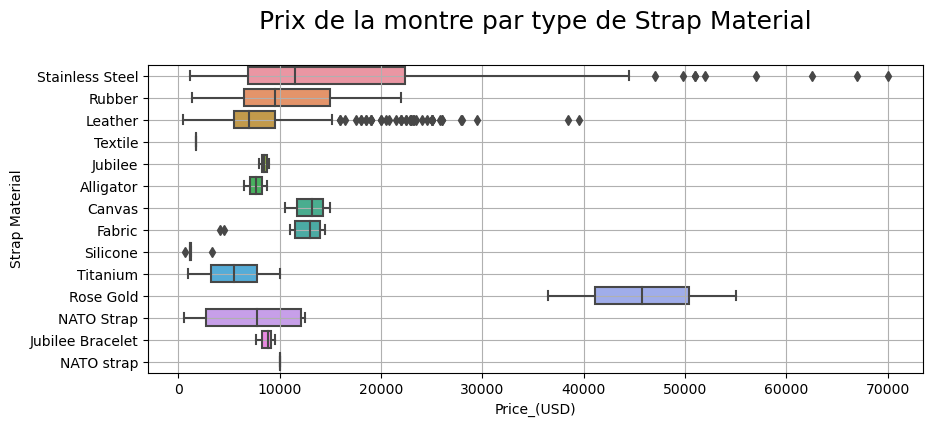

<IPython.core.display.Javascript object>

In [134]:
plt.figure(figsize=(10, 4))
sns.boxplot(x="Price_(USD)", y="Strap Material", data=watch2)
plt.grid()
plt.title("Prix de la montre par type de Strap Material\n", fontsize=18)

## 4.3 Movement Type

### 4.3.1 Répartition de Movement Type

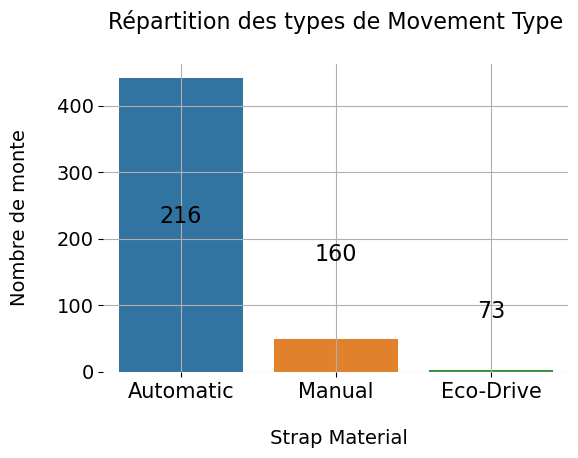

<IPython.core.display.Javascript object>

In [135]:
fig = plt.figure(1, figsize=(6, 4))
Nbr_Mov = watch2["Movement Type"].value_counts()
NBM = sns.barplot(x=Nbr_Mov.index, y=Nbr_Mov.values)

# supprimer les bordures du graphe (côté esthétique)
for s in ["top", "bottom", "left", "right"]:
    NBM.spines[s].set_visible(False)

NBM.bar_label(NBS.containers[0], fontsize=16)  # la valeur de l'ordonnée sur la bar


plt.xticks(fontsize=15)
plt.yticks(fontsize=14)

# légender le graphe
plt.title("Répartition des types de Movement Type\n", fontsize=16)  # titre
plt.xlabel("\n Strap Material", fontsize=14)  # nom axe des abscisses
plt.ylabel("Nombre de monte\n", fontsize=14)  # nom axe des ordonnées
plt.grid()
plt.show()

### 4.3.2 Répartition Movement Type par rapport au prix de la montre

Text(0.5, 1.0, 'Prix de la montre par Movement Type\n')

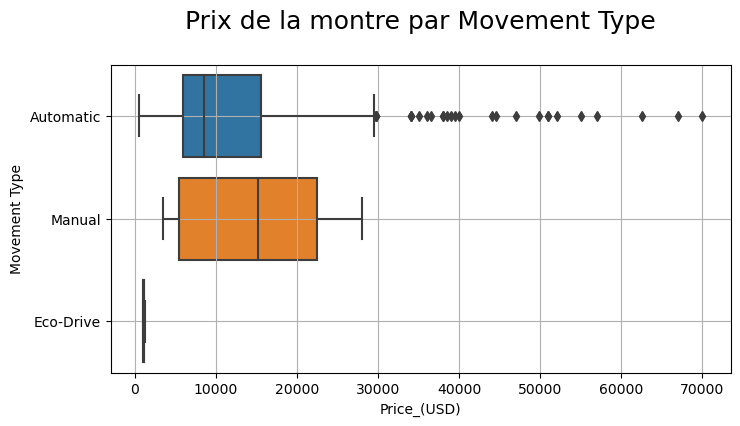

<IPython.core.display.Javascript object>

In [136]:
plt.figure(figsize=(8, 4))
sns.boxplot(x="Price_(USD)", y="Movement Type", data=watch2)
plt.grid()
plt.title("Prix de la montre par Movement Type\n", fontsize=18)

## 4.4 Répartition Case Material par rapport au prix de la montre

Text(0.5, 1.0, 'Prix de la montre par Case Material\n')

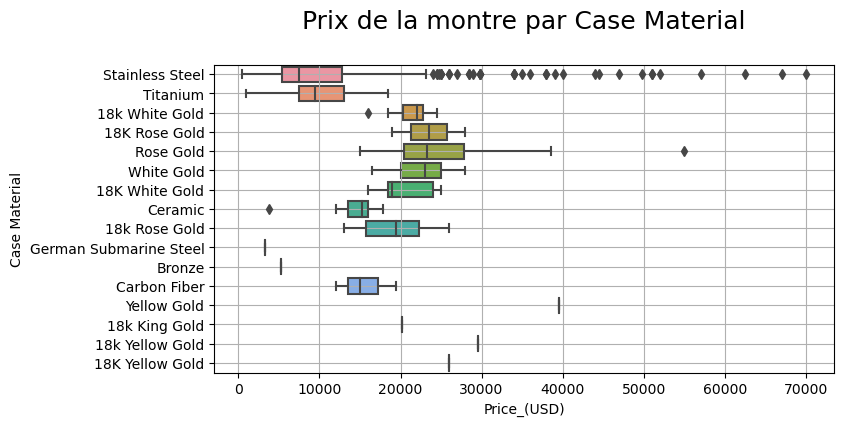

<IPython.core.display.Javascript object>

In [137]:
plt.figure(figsize=(8, 4))
sns.boxplot(x="Price_(USD)", y="Case Material", data=watch2)
plt.grid()
plt.title("Prix de la montre par Case Material\n", fontsize=18)

# 5. TARGET : Valeur à déterminer watch['Price (USD)']

In [138]:
y = watch2["Price_(USD)"]
y

0       9500.0
1       5800.0
2       4200.0
3       7900.0
4       5500.0
        ...   
487    21500.0
488    13500.0
489     1800.0
490    19000.0
491     1200.0
Name: Price_(USD), Length: 492, dtype: float64

<IPython.core.display.Javascript object>

In [139]:
watch2["Price_(USD)"].describe()

count      492.000000
mean     12317.540650
std      10458.175524
min        495.000000
25%       5800.000000
50%       8500.000000
75%      17000.000000
max      70000.000000
Name: Price_(USD), dtype: float64

<IPython.core.display.Javascript object>

<Figure size 1200x800 with 0 Axes>

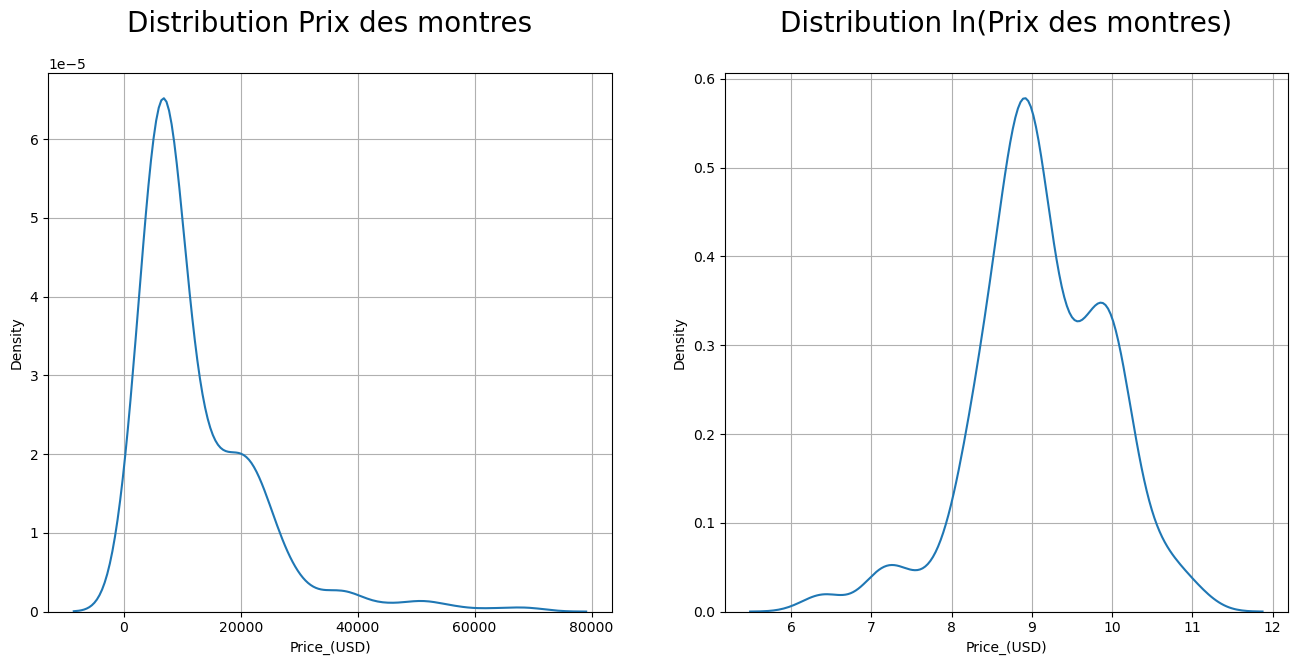

<IPython.core.display.Javascript object>

In [140]:
plt.figure(figsize=(12, 8))
fig, axs = plt.subplots(1, 2, figsize=(16, 7))
sns.kdeplot(watch2["Price_(USD)"], ax=axs[0])
sns.kdeplot(np.log1p(watch2["Price_(USD)"]), ax=axs[1])


axs[0].grid()
axs[1].grid()

axs[0].set_title("Distribution Prix des montres\n", fontsize=20)
axs[1].set_title("Distribution ln(Prix des montres)\n", fontsize=20)
plt.show()

 # 6. Features

Feactures correspondent aux variables permettant de prédire le target.

 ## 6.1 La selection des features 

In [141]:
watch2.columns

Index(['index', 'Brand', 'Model', 'Case Material', 'Strap Material',
       'Movement Type', 'Water Resistance (m)', 'Case Diameter (mm)',
       'Case Thickness (mm)', 'Band Width (mm)', 'Dial Color',
       'Crystal Material', 'Complications', 'Power Reserve(hours)',
       'Price_(USD)'],
      dtype='object')

<IPython.core.display.Javascript object>

In [142]:
len(watch2.columns)

15

<IPython.core.display.Javascript object>

In [143]:
colonne_feature = [
    "Brand",
    "Model",
    "Case Material",
    "Strap Material",
    "Movement Type",
    "Water Resistance (m)",
    "Case Diameter (mm)",
    "Case Thickness (mm)",
    "Band Width (mm)",
    "Dial Color",
    "Crystal Material",
    "Complications",
    "Power Reserve(hours)",
]
len(colonne_feature)

13

<IPython.core.display.Javascript object>

In [144]:
# les features
X = watch2[colonne_feature]
X.head()

,Brand,Model,Case Material,Strap Material,Movement Type,Water Resistance (m),Case Diameter (mm),Case Thickness (mm),Band Width (mm),Dial Color,Crystal Material,Complications,Power Reserve(hours)
0,Rolex,Submariner,Stainless Steel,Stainless Steel,Automatic,300.0,40.0,13.00,20.0,Black,Sapphire,Date,48.0
1,Omega,Seamaster,Titanium,Rubber,Automatic,600.0,43.5,14.47,21.0,Blue,Sapphire,Date,60.0
2,Tag Heuer,Carrera,Stainless Steel,Leather,Automatic,100.0,41.0,13.00,20.0,White,Sapphire,Chronograph,42.0
3,Breitling,Navitimer,Stainless Steel,Stainless Steel,Automatic,30.0,43.0,14.25,22.0,Black,Sapphire,Chronograph,70.0
4,Jaeger-LeCoultre,Reverso,Stainless Steel,Leather,Manual,30.0,42.9,9.20,20.0,Black,Sapphire,None,45.0


<IPython.core.display.Javascript object>

 ## 6.2 Séparation des features numériques et catégoriques

Nous remarquons que notre dataframe possède des variables numériques et des variables catégoriques. Ainsi il est nécessaire de les séparer. Par conséquent nous ferons une liste avec les colonnes numériques et une liste avec les colonnes catégoriques. 

In [145]:
X.select_dtypes(include=np.number).columns  # colonnes numériques

Index(['Water Resistance (m)', 'Case Diameter (mm)', 'Case Thickness (mm)',
       'Band Width (mm)', 'Power Reserve(hours)'],
      dtype='object')

<IPython.core.display.Javascript object>

In [146]:
# colonnes numériques sans le prix
cols_num = [
    "Water Resistance (m)",
    "Case Diameter (mm)",
    "Case Thickness (mm)",
    "Band Width (mm)",
    "Power Reserve(hours)",
]
cols_num

['Water Resistance (m)',
 'Case Diameter (mm)',
 'Case Thickness (mm)',
 'Band Width (mm)',
 'Power Reserve(hours)']

<IPython.core.display.Javascript object>

In [147]:
X.select_dtypes(exclude=np.number).columns  # colonnes categorielles

Index(['Brand', 'Model', 'Case Material', 'Strap Material', 'Movement Type',
       'Dial Color', 'Crystal Material', 'Complications'],
      dtype='object')

<IPython.core.display.Javascript object>

In [148]:
# colonnes catégoriques
cols_categ = [
    "Brand",
    "Model",
    "Case Material",
    "Strap Material",
    "Movement Type",
    "Dial Color",
    "Crystal Material",
    "Complications",
]
cols_categ

['Brand',
 'Model',
 'Case Material',
 'Strap Material',
 'Movement Type',
 'Dial Color',
 'Crystal Material',
 'Complications']

<IPython.core.display.Javascript object>

Enfin nous créeons une pipeline afin de facilité les changements qu'on effectura sur les features.

In [149]:
preprocessor = make_column_transformer(
    (StandardScaler(), cols_num),
    (OneHotEncoder(handle_unknown="ignore"), cols_categ),
    remainder="passthrough",
)

<IPython.core.display.Javascript object>

# 7. Sélectionner les variables apprentissage et test

Nous devons séparer les variables d'apprentissage de celles du test

In [150]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(
    "Entrainement: {} lignes,\nTest: {} lignes.\n".format(
        X_train.shape[0], X_test.shape[0]
    )
)

Entrainement: 393 lignes,
Test: 99 lignes.



<IPython.core.display.Javascript object>

# 8. Modèles potentiels pour Machine learning

Il existe de nombreux modèles, dans notre problème nous utiliserons les suivants; LinearRegression, ElasticNet, RandomForestRegressor, ExtraTreesRegressor et XGBRegressor

## 8.1 Régression Linéaire

In [151]:
model = make_pipeline(preprocessor, LinearRegression())  # le modèle

<IPython.core.display.Javascript object>

In [152]:
model.fit(X_train, y_train)  # entrainement

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Water Resistance (m)',
                                                   'Case Diameter (mm)',
                                                   'Case Thickness (mm)',
                                                   'Band Width (mm)',
                                                   'Power Reserve(hours)']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Brand', 'Model',
                                                   'Case Material',
                                                   'Strap Material',
                                                   'Movement Type',
                                                   'Dial Color',
                                                   'Crystal Material',
                                                   'Complications'])])),
                ('linearregression', LinearRegression())])

<IPython.core.display.Javascript object>

In [153]:
y_pred = model.predict(X_test)  # prediction

MAE = round(mean_absolute_error(y_test, y_pred), 5)  # moyen absolue
RMSE = round(
    np.sqrt(mean_squared_error(y_test, y_pred)), 5
)  # racine moyenne quadratique
R2 = round(r2_score(y_test, y_pred), 5)  # coeff de détermination
print(f" MAE :{MAE} \n RMSE :{RMSE} \n R2 :{R2}")

 MAE :1924.73053 
 RMSE :2770.68718 
 R2 :0.88532


<IPython.core.display.Javascript object>

## 8.2 Différents modèles

Tout d'abord nous allons créer un dictionnaire contenant tous les modèles.  

In [154]:
# création d'un dictionnaire de modèle
algos = {
    "LinearRegression": LinearRegression(),
    "ElasticNet": ElasticNet(),
    "RandomForestRegressor": RandomForestRegressor(),
    "ExtraTreesRegressor": ExtraTreesRegressor(),
    "XGBRegressor": XGBRegressor(),
}
len(algos)

5

<IPython.core.display.Javascript object>

Ensuite nous créerons une liste *results* où nous mettrons nos résultats c'est à dire le nom du modèle, la MAE, la RMSE, le R2 et le temps d'exécution du modèle.

In [155]:
results = []  # création d'une liste

<IPython.core.display.Javascript object>

Maintenant nous pouvons réaliser notre prédiction.

In [156]:
b = ["price"]
for nom_algo, algo in algos.items():  # parcourir dictionnaire
    print(f"Algorithme: {nom_algo}")  # nom modèle
    for i in b:
        start = time.time()
        model = make_pipeline(preprocessor, algo)  # le modèle
        model.fit(X_train, y_train)  # entrainement
        y_pred = model.predict(X_test)  # prediction

        MAE = round(mean_absolute_error(y_test, y_pred), 5)  # erreur moyenne absolue
        RMSE = round(
            np.sqrt(mean_squared_error(y_test, y_pred)), 5
        )  # erreur racine moyenne quadratique
        R2 = round(r2_score(y_test, y_pred), 5)  # coeff de détermination

        end = time.time()
        temps = round(end - start, 3)  # temps entrainement
        print(
            f" MAE :{MAE} \n RMSE :{RMSE} \n R2 :{R2}\n temps entrainement :{temps}s\n"
        )

        print("-" * 100)  # la séparation

        results.append([nom_algo, MAE, RMSE, R2, temps])

Algorithme: LinearRegression
 MAE :1924.73053 
 RMSE :2770.68718 
 R2 :0.88532
 temps entrainement :0.116s

----------------------------------------------------------------------------------------------------
Algorithme: ElasticNet
 MAE :5030.21438 
 RMSE :6313.31423 
 R2 :0.40458
 temps entrainement :0.067s

----------------------------------------------------------------------------------------------------
Algorithme: RandomForestRegressor
 MAE :1925.99227 
 RMSE :3170.02333 
 R2 :0.84988
 temps entrainement :2.906s

----------------------------------------------------------------------------------------------------
Algorithme: ExtraTreesRegressor
 MAE :1918.62862 
 RMSE :3063.48164 
 R2 :0.8598
 temps entrainement :3.172s

----------------------------------------------------------------------------------------------------
Algorithme: XGBRegressor
 MAE :1910.93987 
 RMSE :3285.88619 
 R2 :0.83871
 temps entrainement :0.331s

-----------------------------------------------------------

<IPython.core.display.Javascript object>

Il serait préférable de mettre tous nos résultats sous forme de dataframe.

In [157]:
# liste des noms des colonnes du futur dataFrame
colonnes_resultats = ["algorithme", "MAE", "RMSE", "R2", "temps (s)"]

<IPython.core.display.Javascript object>

In [158]:
# DataFrame regroupent les resultats des modèles
df_results = pd.DataFrame(results, columns=colonnes_resultats)
display(df_results.sort_values(by=["R2"], ascending=False))

,algorithme,MAE,RMSE,R2,temps (s)
0,LinearRegression,1924.73053,2770.68718,0.88532,0.116
3,ExtraTreesRegressor,1918.62862,3063.48164,0.85980,3.172
2,RandomForestRegressor,1925.99227,3170.02333,0.84988,2.906
4,XGBRegressor,1910.93987,3285.88619,0.83871,0.331
1,ElasticNet,5030.21438,6313.31423,0.40458,0.067


<IPython.core.display.Javascript object>

Nous allons tracer les graphes pour chaque métriques.

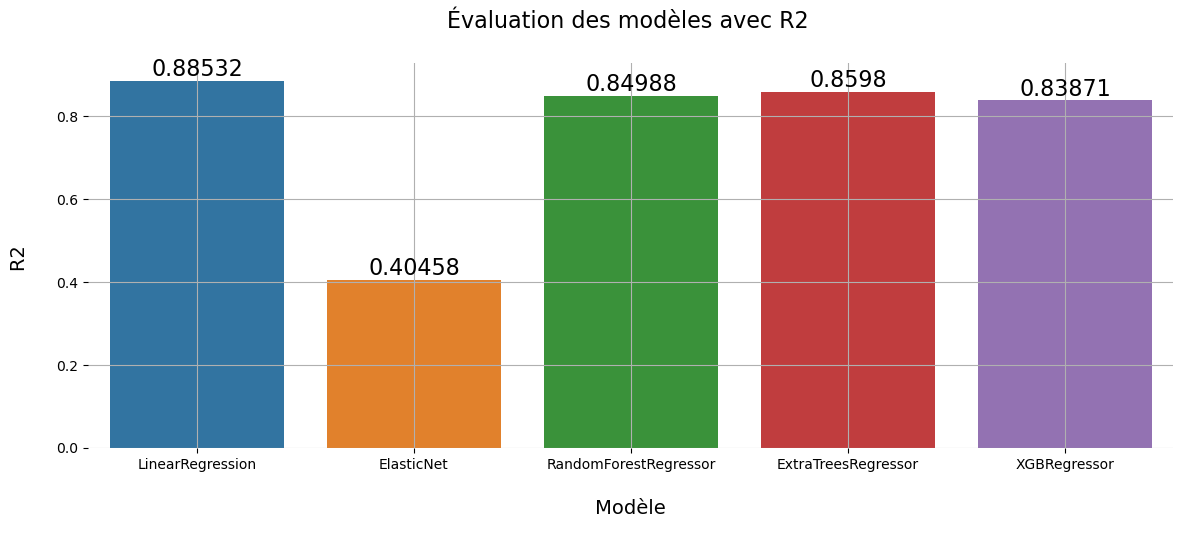

<IPython.core.display.Javascript object>

In [159]:
# Metrique R2
plt.figure(figsize=(14, 5))

splot = sns.barplot(x="algorithme", y="R2", data=df_results)

plt.ylabel("R2 \n", size=14)
plt.xlabel("\n Modèle \n", size=14)
plt.title("Évaluation des modèles avec R2 \n", size=16)


# supprimer les bordures du graphe (côté esthétique)
for s in ["top", "bottom", "left", "right"]:
    splot.spines[s].set_visible(False)

splot.bar_label(splot.containers[0], fontsize=16)  # la valeur de l'ordonnée sur la bar

plt.grid()
plt.show()

D'après le coefficient de détermination les modèles ExtraTreesRegressor et XGBRegressor semblent les plus performant, tandis que ElasticNet semble être un modèle peu performant. Cependant nous pouvons pas conclure la performance d'un modèle en se basant uniquement sur cette métrique. Ainsi nous allons regarder les 2 autres métriques afin de conclure sur la performance de nos modèles.

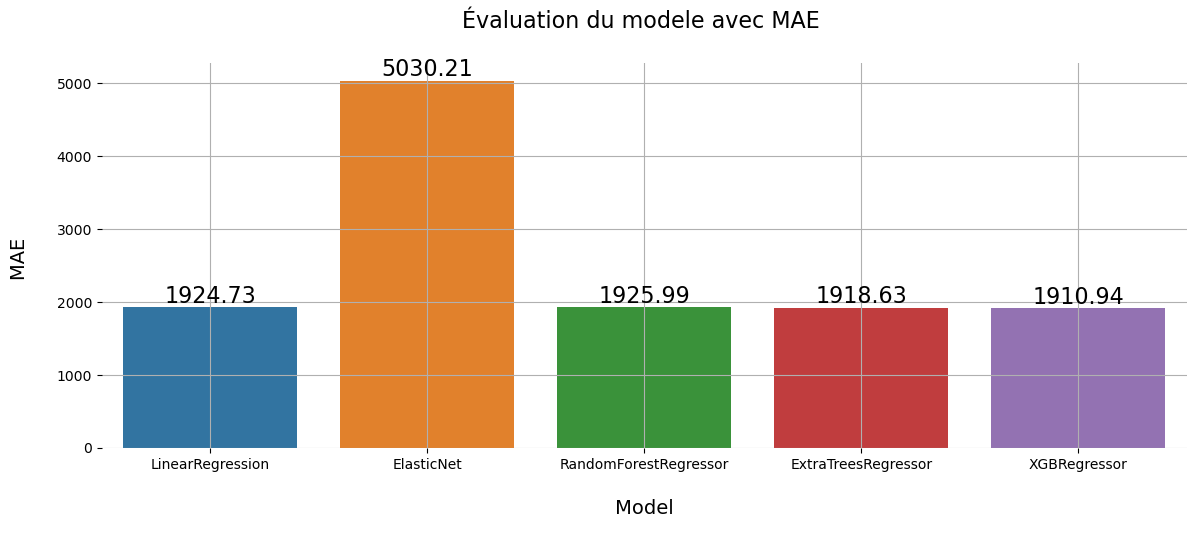

<IPython.core.display.Javascript object>

In [160]:
# Metrique MAE
plt.figure(figsize=(14, 5))
splot = sns.barplot(x="algorithme", y="MAE", data=df_results)

plt.ylabel("MAE \n", size=14)
plt.xlabel("\n Model \n", size=14)
plt.title("Évaluation du modele avec MAE \n", size=16)


# supprimer les bordures du graphe (côté esthétique)
for s in ["top", "bottom", "left", "right"]:
    splot.spines[s].set_visible(False)

splot.bar_label(splot.containers[0], fontsize=16)  # la valeur de l'ordonnée sur la bar

plt.grid()
plt.show()

Les modèles ayant la MAE les plus faible sont RandomForestRegressor, ExtraTreesRegressor et XGBRegressor, ces valeurs sont cohérente avec R². Nous pouvons constater que LinearRegressio , ayant un R² 2 fois plus grand que ElasticNet, possède une MAE similaire à ElasticNet. 

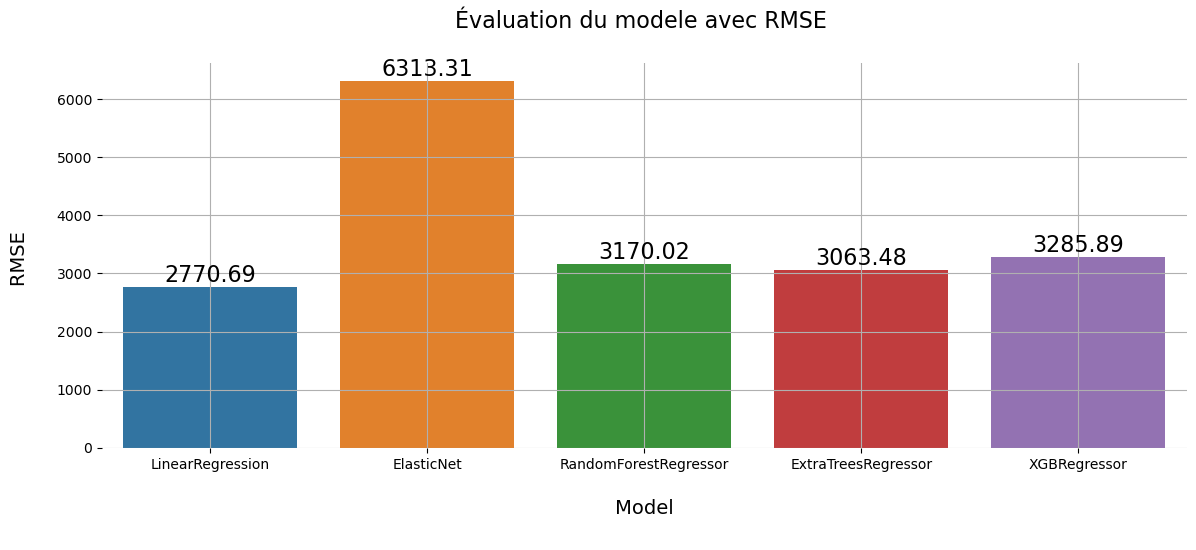

<IPython.core.display.Javascript object>

In [161]:
# Metrique RSME
plt.figure(figsize=(14, 5))
splot = sns.barplot(x="algorithme", y="RMSE", data=df_results)

plt.ylabel("RMSE \n", size=14)
plt.xlabel("\n Model \n", size=14)
plt.title("Évaluation du modele avec RMSE \n", size=16)


# supprimer les bordures du graphe (côté esthétique)
for s in ["top", "bottom", "left", "right"]:
    splot.spines[s].set_visible(False)

splot.bar_label(splot.containers[0], fontsize=16)  # la valeur de l'ordonnée sur la bar

plt.grid()
plt.show()

Après l'analyse des 3 métriques nous pouvons éloigner le modèle Elastic et LinearRegression qui sont les moins performant. 

## 9 Machine Learning  avec gridsearch

## 9.1  Afficher les paramètres selon le modèle

Nous allons afficher tous les hyperparamètres de chacun de nos modèles.

In [162]:
# création d'un dictionnaire de modèle
algos1 = {
    "LinearRegression": LinearRegression(),
    "RandomForestRegressor": RandomForestRegressor(),
    "ExtraTreesRegressor": ExtraTreesRegressor(),
    "XGBRegressor": XGBRegressor(),
}

<IPython.core.display.Javascript object>

In [163]:
for nom_algo, algo in algos.items():  # parcourir un dictionnaire
    print(f"Algorithme: {nom_algo}")
    for i in b:
        params = algo.get_params()  # les parametres du dictionnnaires
        print(f" les parametres :{params} \n ")
        print("-" * 100)  # la séparation

Algorithme: LinearRegression
 les parametres :{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False} 
 
----------------------------------------------------------------------------------------------------
Algorithme: ElasticNet
 les parametres :{'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False} 
 
----------------------------------------------------------------------------------------------------
Algorithme: RandomForestRegressor
 les parametres :{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': 

<IPython.core.display.Javascript object>

## 9.2  Dictionnaires des hyperparamètres par modèle

Nous réaliserons un dictionnaire pour chaque modèle contenant les hyperparamètres qui nous intéressent. Nous choissons 3 valeurs d'hyperparamètres qu'on mettera dans un liste.

In [164]:
params_LinearRegression = {
    "linearregression__fit_intercept": [True, False],
    "linearregression__positive": [True, False],
}

<IPython.core.display.Javascript object>

In [165]:
params_RandomForestRegressor = {
    "randomforestregressor__min_samples_leaf": [3, 4, 5],
    "randomforestregressor__n_estimators": [100, 200, 300],
}

<IPython.core.display.Javascript object>

In [166]:
params_ExtraTreesRegressor = {
    "extratreesregressor__min_samples_leaf": [1, 2, 3],
    "extratreesregressor__min_samples_split": [2, 4, 6],
    "extratreesregressor__n_estimators": [100, 200, 300],
}

<IPython.core.display.Javascript object>

In [167]:
params_XGBRegressor = {
    "xgbregressor__learning_rate": [0.03, 0.05, 0.07],
    "xgbregressor__max_depth": [5, 6, 7],
    "xgbregressor__n_estimators": [100, 200, 500],
}

<IPython.core.display.Javascript object>

## 9.3 Dictionnaire du nom et des paramètres d'un modèle

In [168]:
# les modèles
algos2 = [
    LinearRegression(),
    RandomForestRegressor(),
    ExtraTreesRegressor(),
    XGBRegressor(),
]

<IPython.core.display.Javascript object>

In [169]:
# noms des modèles
nom_algo2 = [
    "LinearRegression",
    "RandomForestRegressor",
    "ExtraTreesRegressor",
    "XGBRegressor",
]

<IPython.core.display.Javascript object>

In [170]:
# création d'un dictionnaire de paramètre de chaque modèle
paramsgrid = {
    "params_LinearRegression": params_LinearRegression,
    "params_RandomForestRegressor": params_RandomForestRegressor,
    "params_ExtraTreesRegressor": params_ExtraTreesRegressor,
    "params_XGBRegressor": params_XGBRegressor,
}

<IPython.core.display.Javascript object>

In [171]:
# clé du dictionnaire de parametres
indice_params = [
    "params_LinearRegression",
    "params_RandomForestRegressor",
    "params_ExtraTreesRegressor",
    "params_XGBRegressor",
]

<IPython.core.display.Javascript object>

## 9.4. Détermination des meilleurs hyperparamètres avec GridSearch

Nous avons réalisé une boucle, cependant il est toujours nécessaire de tester la boucle pour un seul algorithme. Ainsi nous devons tester une première fois la boucle avec la condition j<1, dans notre cas elle fonctionne, puis on met la relance avec la condition j<3

In [172]:
resultsGrid = []
j = 0
while j < 4:
    # nom du model
    nom = nom_algo2[j]

    # le model
    start = time.time()  # temps depart
    modelAlgo = algos2[j]  # le model_j
    model_j = make_pipeline(preprocessor, modelAlgo)

    # les paramètres du model
    indice = indice_params[j]  # nom de la clé du dicto params
    params = paramsgrid[indice]

    # Gridsearch
    grid_model = GridSearchCV(model_j, params, cv=10, scoring="r2")
    grid_model.fit(X_train, y_train)
    y_pred0 = grid_model.predict(X_test)

    # Meilleur score
    best_score = grid_model.best_score_

    # Meilleur model/estimator
    best_model = grid_model.best_estimator_  # meilleur model KNeighborsClassifier
    best_model.fit(X_train, y_train)
    y_pred = grid_model.predict(X_test)

    # Metriques

    MAE = round(mean_absolute_error(y_test, y_pred), 5)  # moyen absolue
    RMSE = round(
        np.sqrt(mean_squared_error(y_test, y_pred)), 5
    )  # racine moyenne quadratique
    R2 = round(r2_score(y_test, y_pred), 5)  # coeff de détermination

    end = time.time()
    temps = round(end - start, 3)  # temps entrainement
    print(f" Algorithme :{modelAlgo}\n")
    print(f" MAE :{MAE} \n RMSE :{RMSE} \n R2 :{R2}\n temps entrainement :{temps}s\n")

    print("-" * 100)  # la séparation

    resultsGrid.append([nom, MAE, RMSE, R2, best_score, temps])  #

    j = j + 1

 Algorithme :LinearRegression()

 MAE :1924.73053 
 RMSE :2770.68718 
 R2 :0.88532
 temps entrainement :3.305s

----------------------------------------------------------------------------------------------------
 Algorithme :RandomForestRegressor()

 MAE :1797.72866 
 RMSE :2872.62255 
 R2 :0.87673
 temps entrainement :300.234s

----------------------------------------------------------------------------------------------------
 Algorithme :ExtraTreesRegressor()

 MAE :1857.64855 
 RMSE :2719.56716 
 R2 :0.88951
 temps entrainement :1196.682s

----------------------------------------------------------------------------------------------------
 Algorithme :XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=No

<IPython.core.display.Javascript object>

In [173]:
colonnes2 = ["Algorithme", "MAE", "RMSE", "R2", "best_score", "temps"]

<IPython.core.display.Javascript object>

Nous avons ainsi les meilleurs hyperparamètres de chaque modèle.

## 9.5 Meilleur estimateur

Nous modifions les hyperparamètres de chaque modèle avec ceux obtenus par le *grid_model.best_params_*.

In [174]:
df_resultsGrid = pd.DataFrame(resultsGrid, columns=colonnes2)

<IPython.core.display.Javascript object>

In [175]:
df_resultsGrid

,Algorithme,MAE,RMSE,R2,best_score,temps
0,LinearRegression,1924.73053,2770.68718,0.88532,-0.371300,3.305
1,RandomForestRegressor,1797.72866,2872.62255,0.87673,0.806363,300.234
2,ExtraTreesRegressor,1857.64855,2719.56716,0.88951,0.847594,1196.682
3,XGBRegressor,1899.86764,3138.25166,0.85287,0.838030,94.252


<IPython.core.display.Javascript object>

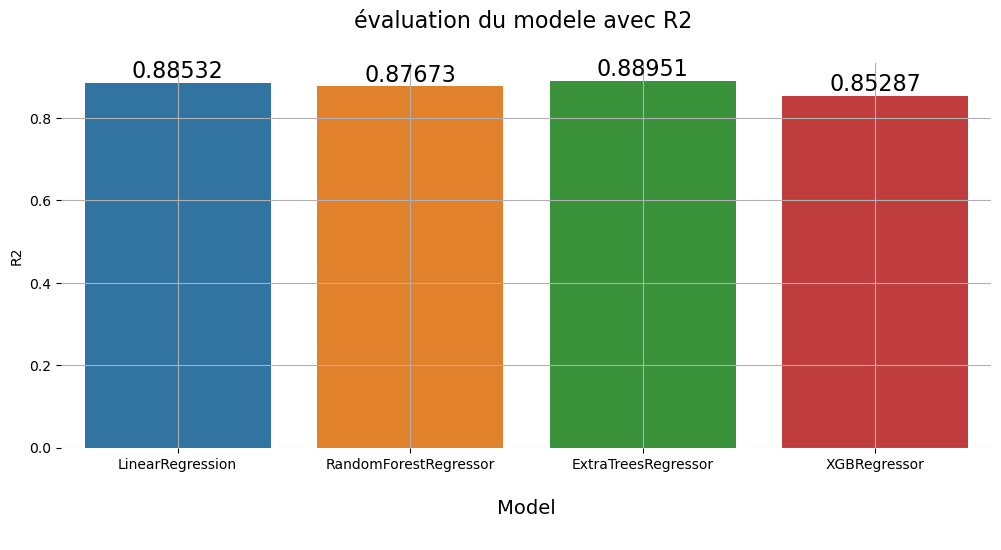

<IPython.core.display.Javascript object>

In [176]:
# R2
plt.figure(figsize=(12, 5))
splot1 = sns.barplot(x="Algorithme", y="R2", data=df_resultsGrid)

plt.xlabel("\n Model \n", size=14)
plt.title("évaluation du modele avec R2 \n", size=16)


# supprimer les bordures du graphe (côté esthétique)
for s in ["top", "bottom", "left", "right"]:
    splot1.spines[s].set_visible(False)

splot1.bar_label(
    splot1.containers[0], fontsize=16
)  # la valeur de l'ordonnée sur la bar

plt.grid()
plt.show()

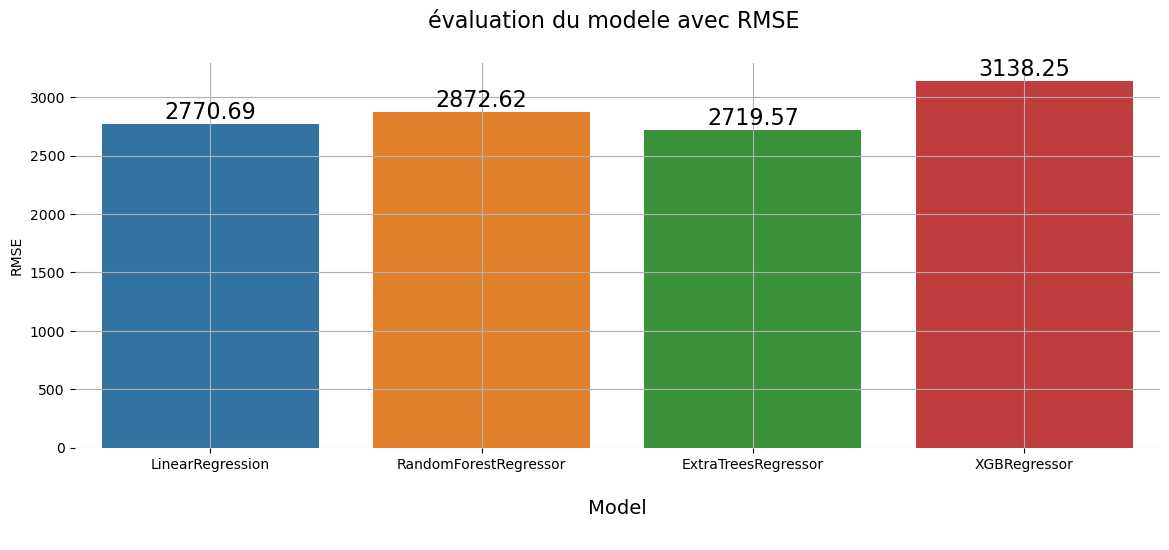

<IPython.core.display.Javascript object>

In [177]:
# RSMSE
plt.figure(figsize=(14, 5))
splot2 = sns.barplot(x="Algorithme", y="RMSE", data=df_resultsGrid)

plt.xlabel("\n Model \n", size=14)
plt.title("évaluation du modele avec RMSE \n", size=16)


# supprimer les bordures du graphe (côté esthétique)
for s in ["top", "bottom", "left", "right"]:
    splot2.spines[s].set_visible(False)

splot2.bar_label(
    splot2.containers[0], fontsize=16
)  # la valeur de l'ordonnée sur la bar

plt.grid()
plt.show()

## 10 SHAP

Il serait intéressant de déterminer les colonnes les plus influentes pour notre modèle le plus performant *ExtraTreesRegressor()*, ainsi nous allons utiliser la librairie *shap* 

In [178]:
cat_transformer = TargetEncoder()
num_transformer = RobustScaler(
    with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0), copy=True
)


preprocessor = ColumnTransformer(
    transformers=[
        ("cat", cat_transformer, cols_categ),
        ("num", num_transformer, cols_num),
    ]
)


X_preprocessed = preprocessor.fit_transform(X, y)


X_train, X_test, y_train, y_test = train_test_split(
    X_preprocessed, y, test_size=0.2, random_state=42
)

ETR = ExtraTreesRegressor()
ETR.fit(X_train, y_train)

ExtraTreesRegressor()

<IPython.core.display.Javascript object>

In [179]:
X

,Brand,Model,Case Material,Strap Material,Movement Type,Water Resistance (m),Case Diameter (mm),Case Thickness (mm),Band Width (mm),Dial Color,Crystal Material,Complications,Power Reserve(hours)
0,Rolex,Submariner,Stainless Steel,Stainless Steel,Automatic,300.0,40.0,13.00,20.0,Black,Sapphire,Date,48.0
1,Omega,Seamaster,Titanium,Rubber,Automatic,600.0,43.5,14.47,21.0,Blue,Sapphire,Date,60.0
2,Tag Heuer,Carrera,Stainless Steel,Leather,Automatic,100.0,41.0,13.00,20.0,White,Sapphire,Chronograph,42.0
3,Breitling,Navitimer,Stainless Steel,Stainless Steel,Automatic,30.0,43.0,14.25,22.0,Black,Sapphire,Chronograph,70.0
4,Jaeger-LeCoultre,Reverso,Stainless Steel,Leather,Manual,30.0,42.9,9.20,20.0,Black,Sapphire,None,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,Breguet,Classique,18k Rose Gold,Leather,Automatic,30.0,38.5,8.25,20.0,White,Sapphire,Date,38.0
488,Blancpain,Fifty Fathoms,Stainless Steel,Fabric,Automatic,300.0,45.0,15.50,23.0,Black,Sapphire,Date,120.0
489,Longines,Master Collection,Stainless Steel,Leather,Automatic,30.0,38.5,9.70,20.0,Blue,Sapphire,Date,64.0
490,Vacheron Constantin,Overseas,Stainless Steel,Stainless Steel,Automatic,150.0,41.5,11.00,22.0,Blue,Sapphire,Date,40.0


<IPython.core.display.Javascript object>

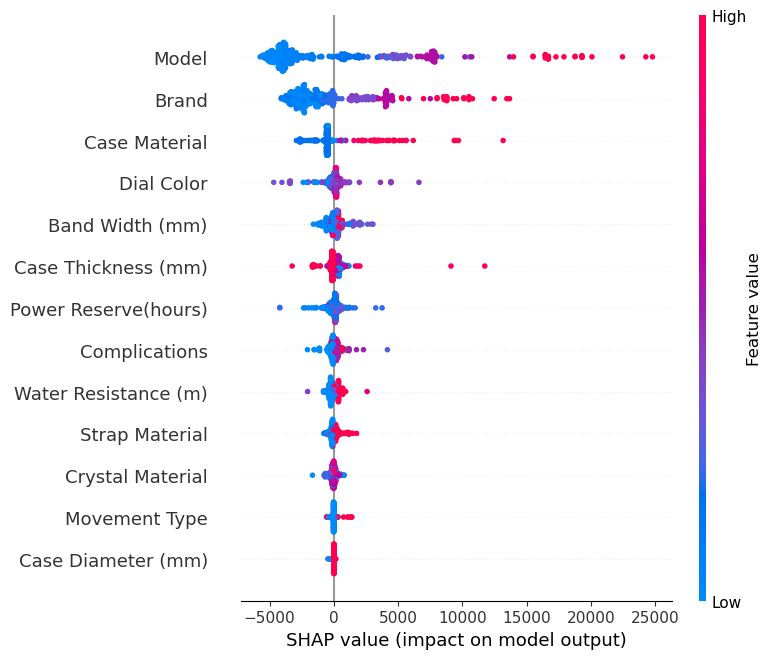

<IPython.core.display.Javascript object>

In [180]:
explainer = shap.TreeExplainer(ETR)


shap_values = explainer.shap_values(X_train)


# GRAPHIQUE
shap.summary_plot(shap_values, X_train, feature_names=X.columns.tolist())

Les features les plus influents lors de notre prédiction sont  Model ( le modèle), Brand ( la marque ) et Case Material (La matière du boîtier de la montre )